In [106]:
import noise
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
import numpy as np
import cv2
%matplotlib inline

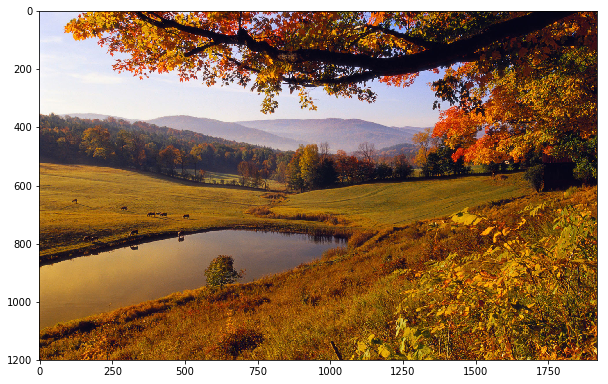

In [96]:
img_path = '../../data/images/osen-darevya-trava-pole.jpg'
img = np.array(Image.open(img_path).convert('RGB'), dtype=np.uint8)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [3]:
noise.pnoise1(np.sin(125))

-0.026765823364257812

In [134]:
pnoise = np.vectorize(noise.pnoise1)

def generate_base(shape):
    res = np.random.rand(*shape)
    x = pnoise(res)
    image = Image.fromarray((x * 255.0).astype(np.uint8))
    filtered = np.array(image.filter(ImageFilter.GaussianBlur(radius=1))) / 255.0
    return filtered

def src_correct_by_base_color(img, dst_color, src_color):
    return (img * dst_color / src_color).clip(0, 255).astype('uint8')

def get_merge_area(img):
    area = img[
        img.shape[0] // 2:img.shape[0] // 2 + 1, 
        img.shape[1] // 2:img.shape[1] // 2 + 1
    ]
    return np.array([area[..., i].mean() for i in range(3)])

def correct_by_base_color(original, corrected):
    dcolor = get_merge_area(original)
    scolor = get_merge_area(corrected)
    return src_correct_by_base_color(corrected, dcolor, scolor)

def correct_by_avg(img):
    colors_avg = np.array([img[:, :, i].mean() for i in range(3)])
    avg = colors_avg.mean()
    return (img * avg / colors_avg).clip(0, 255).astype('uint8')

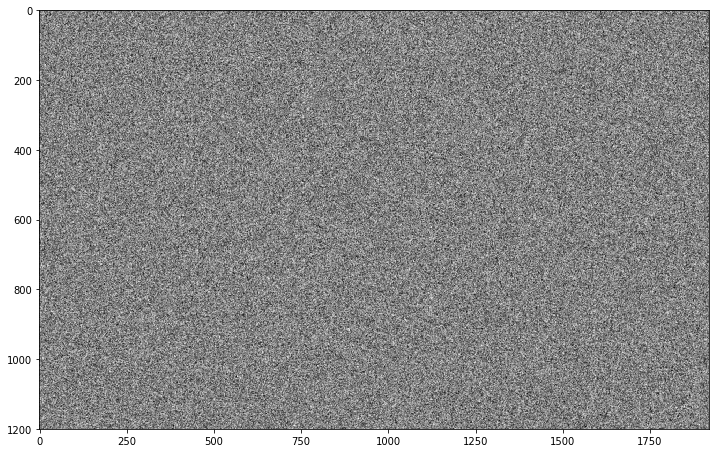

In [123]:
x = generate_base(img.shape[:2])

plt.figure(figsize=(12, 12))
plt.imshow(x)
plt.gray()
plt.show()

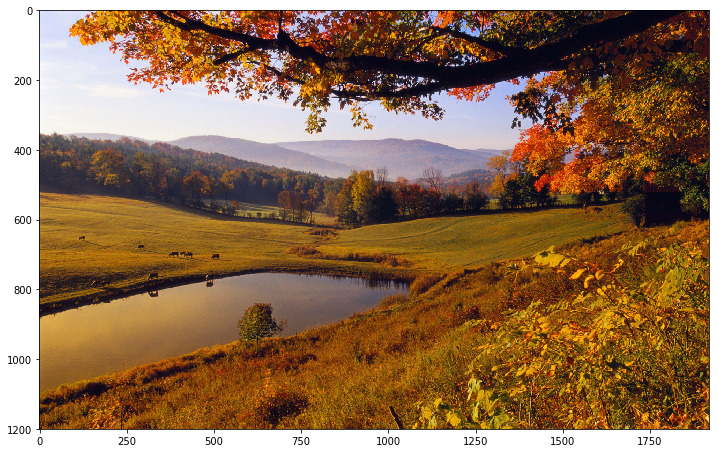

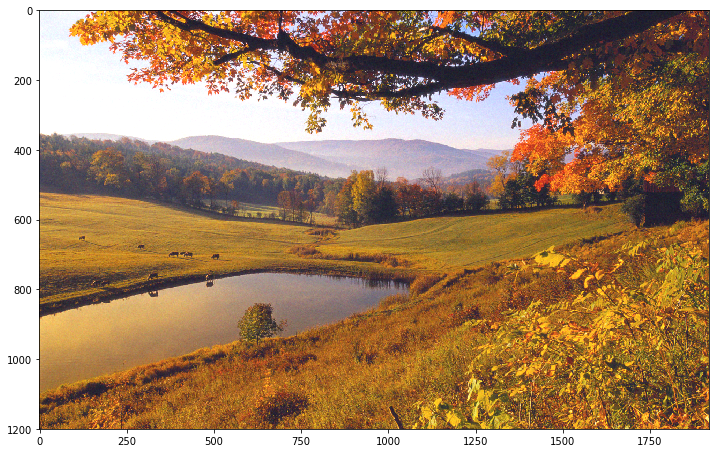

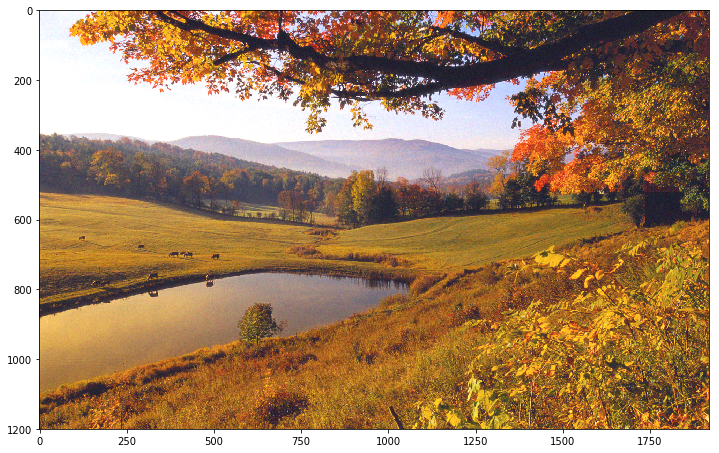

113.10535633680556


In [140]:
k = 5

noise_img = ((
    img.astype(np.float32) / 255.0\
        + np.array([generate_base(img.shape[:2]) / k for _ in range(3)], dtype=np.float32).transpose((1, 2, 0))
).clip(0, 1) * 255).astype(np.uint8)

noise_img1 = ((
    img.astype(np.float32) / 255.0\
        + np.array([generate_base(img.shape[:2]) / k for _ in range(3)], dtype=np.float32).transpose((1, 2, 0))
).clip(0, 1) * 255).astype(np.uint8)


plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()

plt.figure(figsize=(12, 12))
plt.imshow(noise_img)
plt.gray()

plt.figure(figsize=(12, 12))
plt.imshow(noise_img1)
plt.gray()

plt.show()

print(np.abs(noise_img - noise_img1).mean())

In [133]:
Image.fromarray((noise_img).astype(np.uint8)).save('../../data/images/noised_osen-darevya-trava-pole.jpg')